## K-Means Clustering - Unsupervised Machine Learning

Task:
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

A part of Data Science Internship @ The Sparks Foundation

By Tanishka Marrott

In [12]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


### Data Preparation

In [11]:
#Loading the iris dataset
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding optimal number of clusters for K-means and determining the value of K

In [21]:
x = df_iris.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### A Visual Representation for Observing Patterns

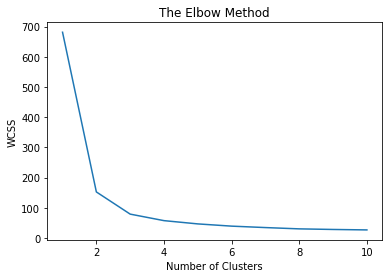

In [22]:
# PLotting a linear graph to observe 'the elbow'
# wcss stands for Within The Cluster Sum of Squares

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


### Creating the K-Means Classifier

In [25]:
# Applying K-Means to the Dataset
# Creating the K-Means Classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x)

### Visualising the Cluster Data

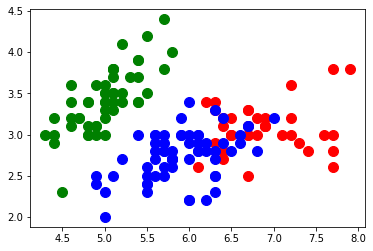

In [67]:
# Cluster Visualisation

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')

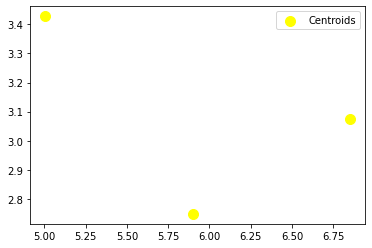

In [40]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Combined Cluster Visualisation

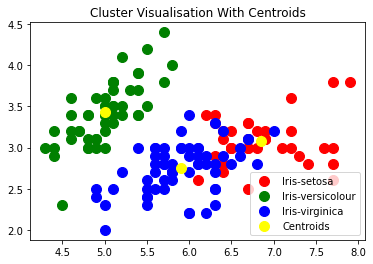

In [69]:
# Cluster Visualisation

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'blue', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Cluster Visualisation With Centroids')
plt.legend()
